In [1780]:
import pandas as pd
import numpy as np
import statistics as stats
import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation
from scipy.stats import norm
import sweetviz as sv
import missingno as mi
import IPython
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
import mglearn
from sklearn.ensemble import RandomForestRegressor
lm = LinearRegression()
%matplotlib inline 
sns.set(color_codes=True)

In [1781]:
df = pd.read_csv("PEA01_Pop Estimates 1950_2023_Age Group Sex.csv", header = 0,  dtype = {'Statistic Label': str,'Year': int,
                                                      'Age Group': str,'Sex': str, 'UNIT': str, 'VALUE': int})

In [1782]:
df.head(5)

,STATISTIC Label,Year,Age Group,Sex,UNIT,VALUE
0,Population Estimates (Persons in April),1950,Under 1 year,Both sexes,Thousand,61
1,Population Estimates (Persons in April),1950,Under 1 year,Male,Thousand,31
2,Population Estimates (Persons in April),1950,Under 1 year,Female,Thousand,30
3,Population Estimates (Persons in April),1950,0 - 4 years,Both sexes,Thousand,0
4,Population Estimates (Persons in April),1950,0 - 4 years,Male,Thousand,0


In [1783]:
df.tail(5) 

,STATISTIC Label,Year,Age Group,Sex,UNIT,VALUE
5989,Population Estimates (Persons in April),2023,85 years and over,Male,Thousand,33
5990,Population Estimates (Persons in April),2023,85 years and over,Female,Thousand,54
5991,Population Estimates (Persons in April),2023,All ages,Both sexes,Thousand,5282
5992,Population Estimates (Persons in April),2023,All ages,Male,Thousand,2606
5993,Population Estimates (Persons in April),2023,All ages,Female,Thousand,2675


In [1784]:
df.dtypes

STATISTIC Label    object
Year                int32
Age Group          object
Sex                object
UNIT               object
VALUE               int32
dtype: object

In [1785]:
df = df.drop(["STATISTIC Label"], axis=1)

In [1786]:
df = df.drop(["UNIT"], axis=1)
df.head(5)

,Year,Age Group,Sex,VALUE
0,1950,Under 1 year,Both sexes,61
1,1950,Under 1 year,Male,31
2,1950,Under 1 year,Female,30
3,1950,0 - 4 years,Both sexes,0
4,1950,0 - 4 years,Male,0


In [1787]:
df.shape

(5994, 4)

In [1788]:
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (0, 4)


In [1789]:
#We have no duplicate rows. No need to drop dupplicate rows from our df.

In [1790]:
df.count() 

Year         5994
Age Group    5994
Sex          5994
VALUE        5994
dtype: int64

In [1791]:
#We have values in all columns except the last column "VALUE". 
#It seems there are nulls or blanks present on certain rows.

In [1792]:
print(df.isnull().sum())

Year         0
Age Group    0
Sex          0
VALUE        0
dtype: int64


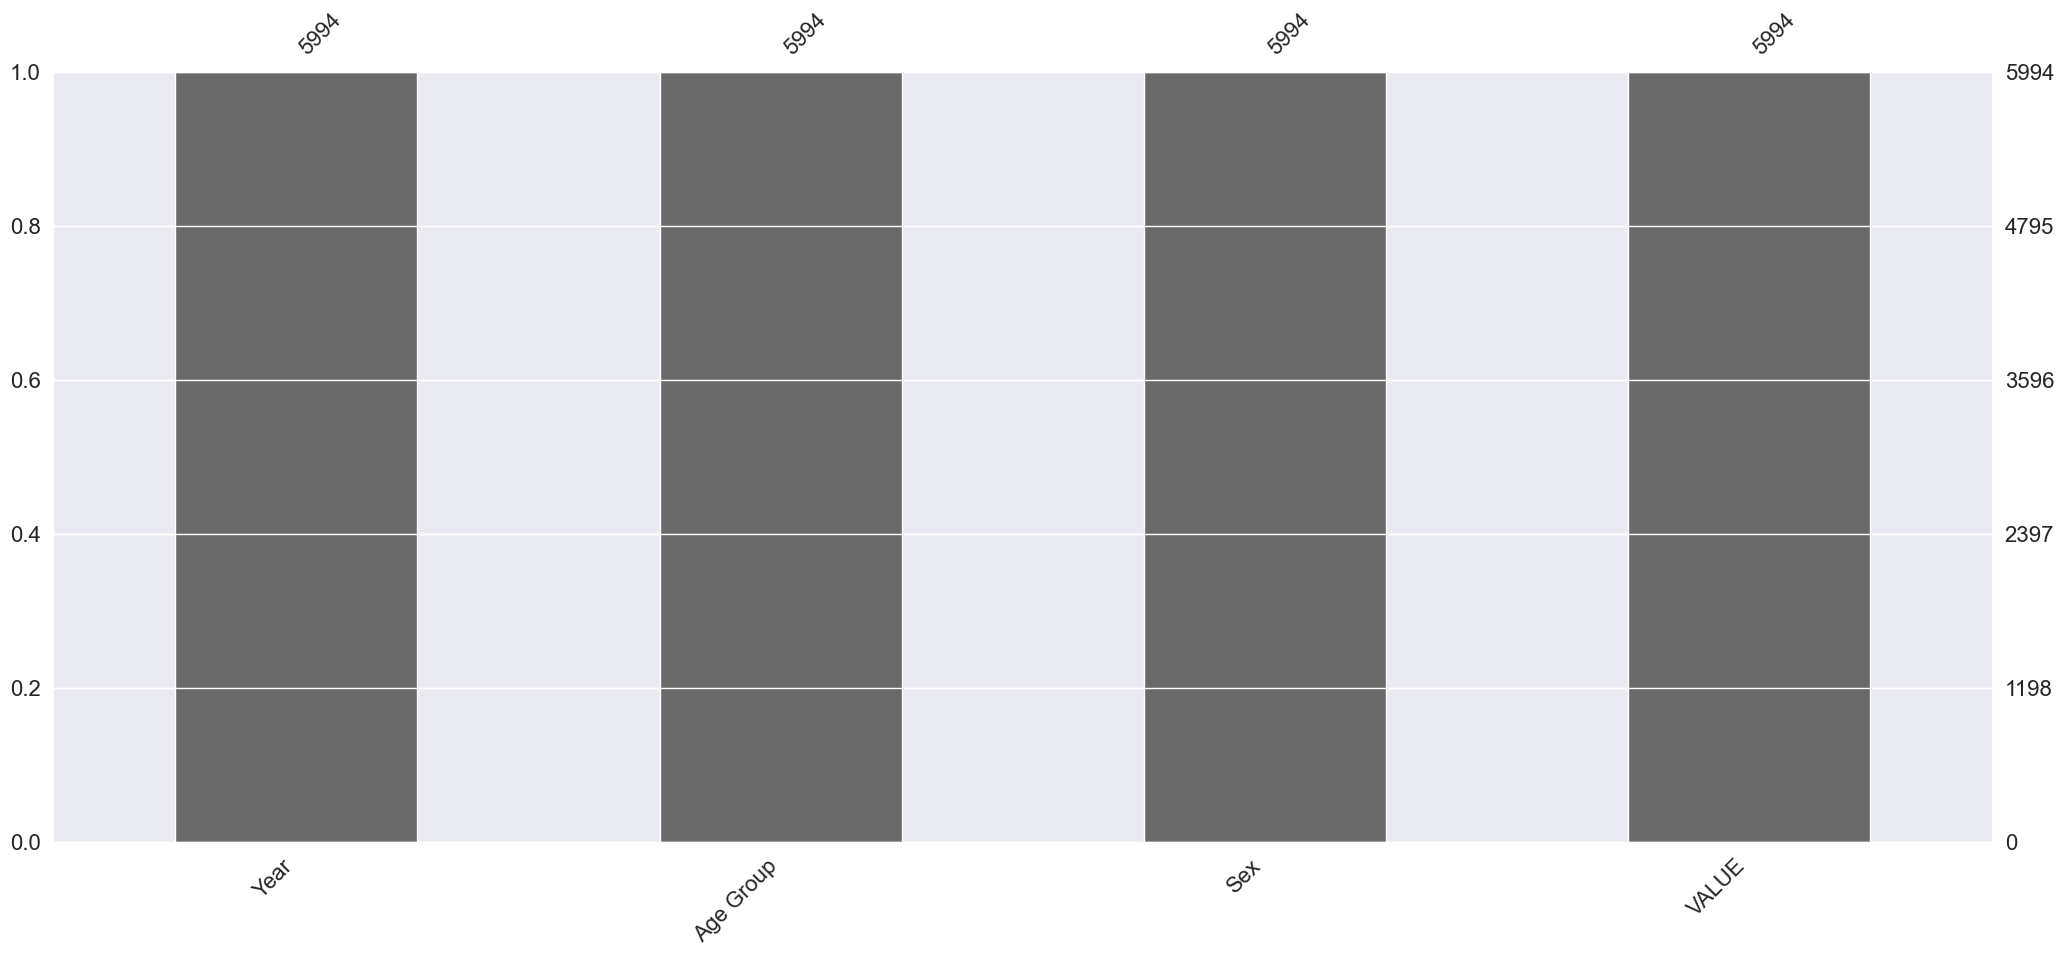

In [1793]:
mi.bar(df)
plt.show()

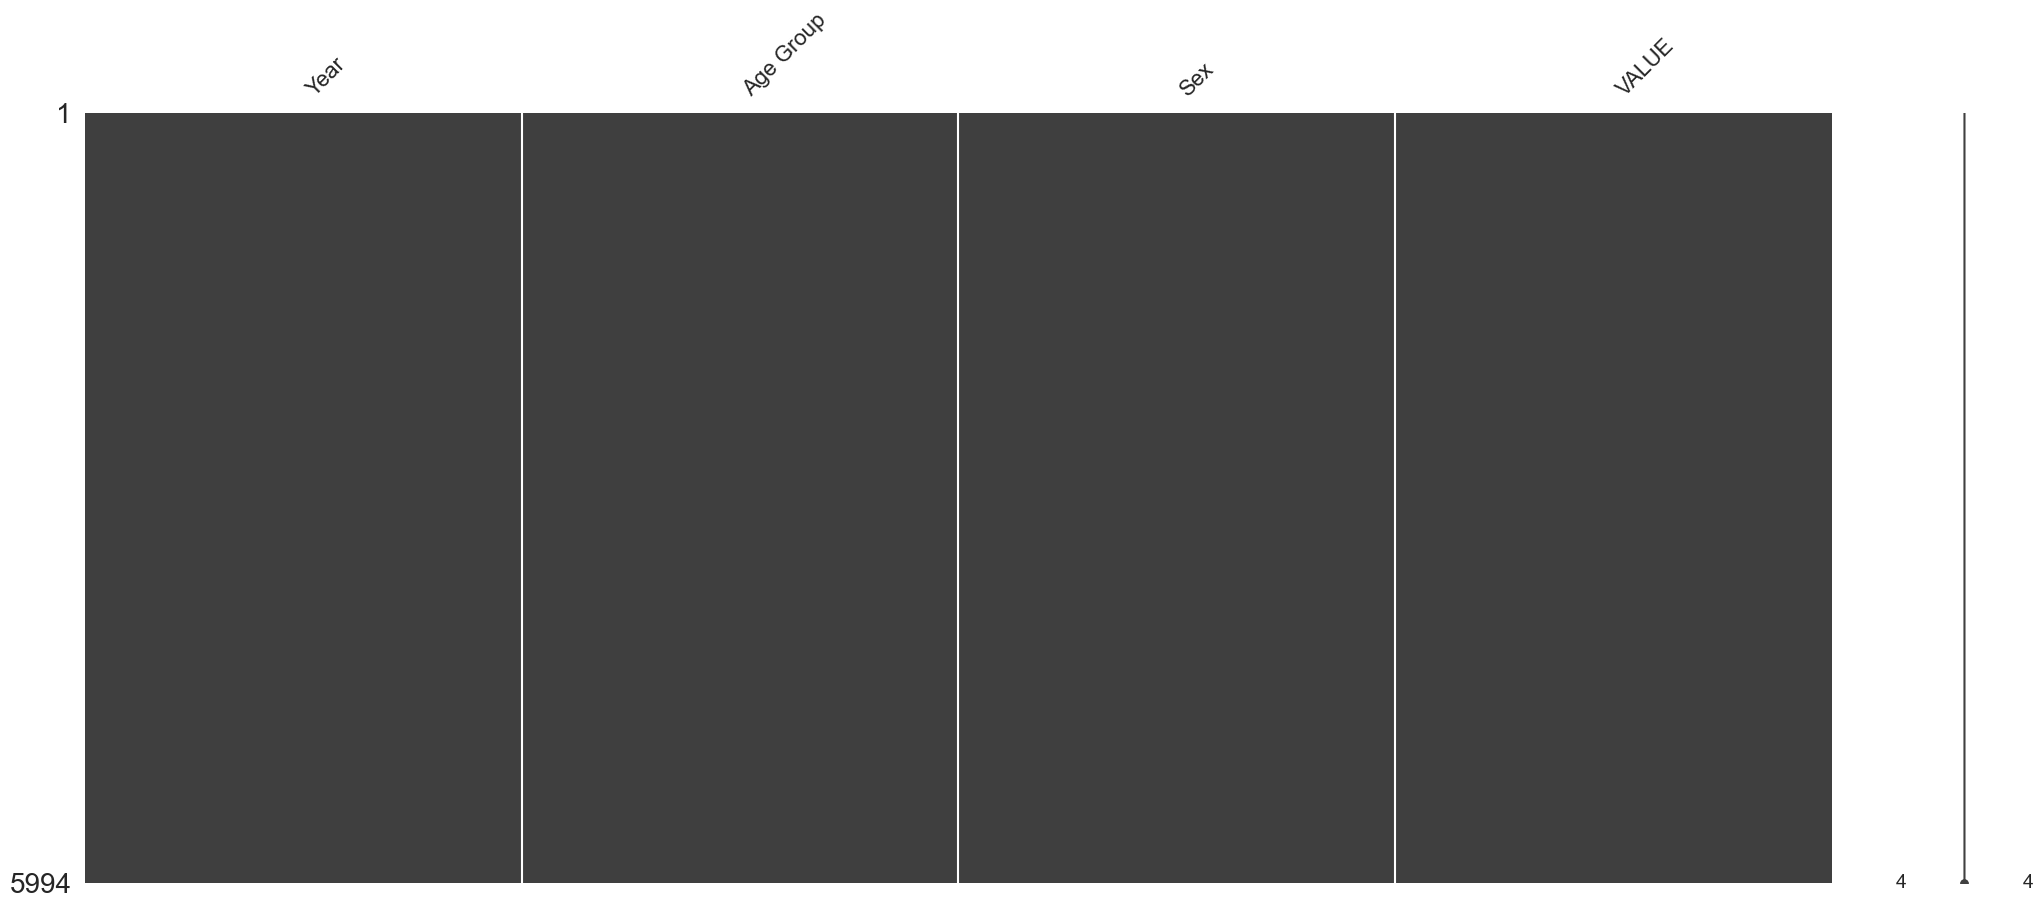

In [1794]:
mi.matrix(df)
plt.show()

In [1795]:
#We have 114 rows with no data/nulls. Looking at the above graph we can see an even distribution in the older census years where this data wasn't avaialble; there is no "Sex" data for 0-4 year olds. 
#This is likely an artefact of how we collect data on babies for the Census in Ireland in that age range.
#We have complete data for "SEX" however for the age range "1-4". We should use it instead and exclude 0-4 in our analysis potentially.

In [1796]:
df = df.dropna() 
df.count()

Year         5994
Age Group    5994
Sex          5994
VALUE        5994
dtype: int64

In [1797]:
# filtered_df will be our curated dataset going forwar in the analysis

In [1798]:
analyze_report = sv.analyze(df)
analyze_report.show_html('analyze.html', open_browser=False)

                                             |          | [  0%]   00:00 -> (? left)

Report analyze.html was generated.



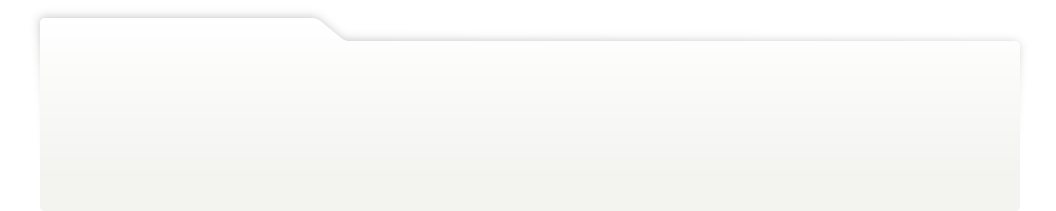
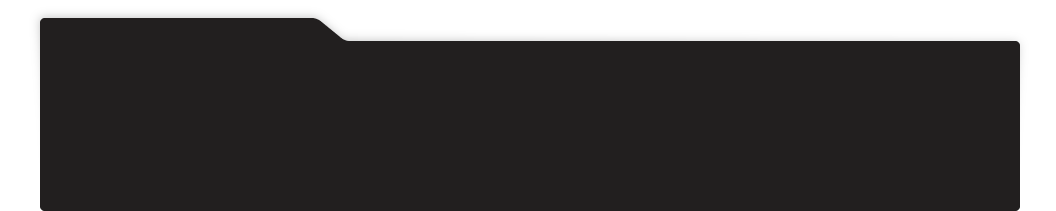
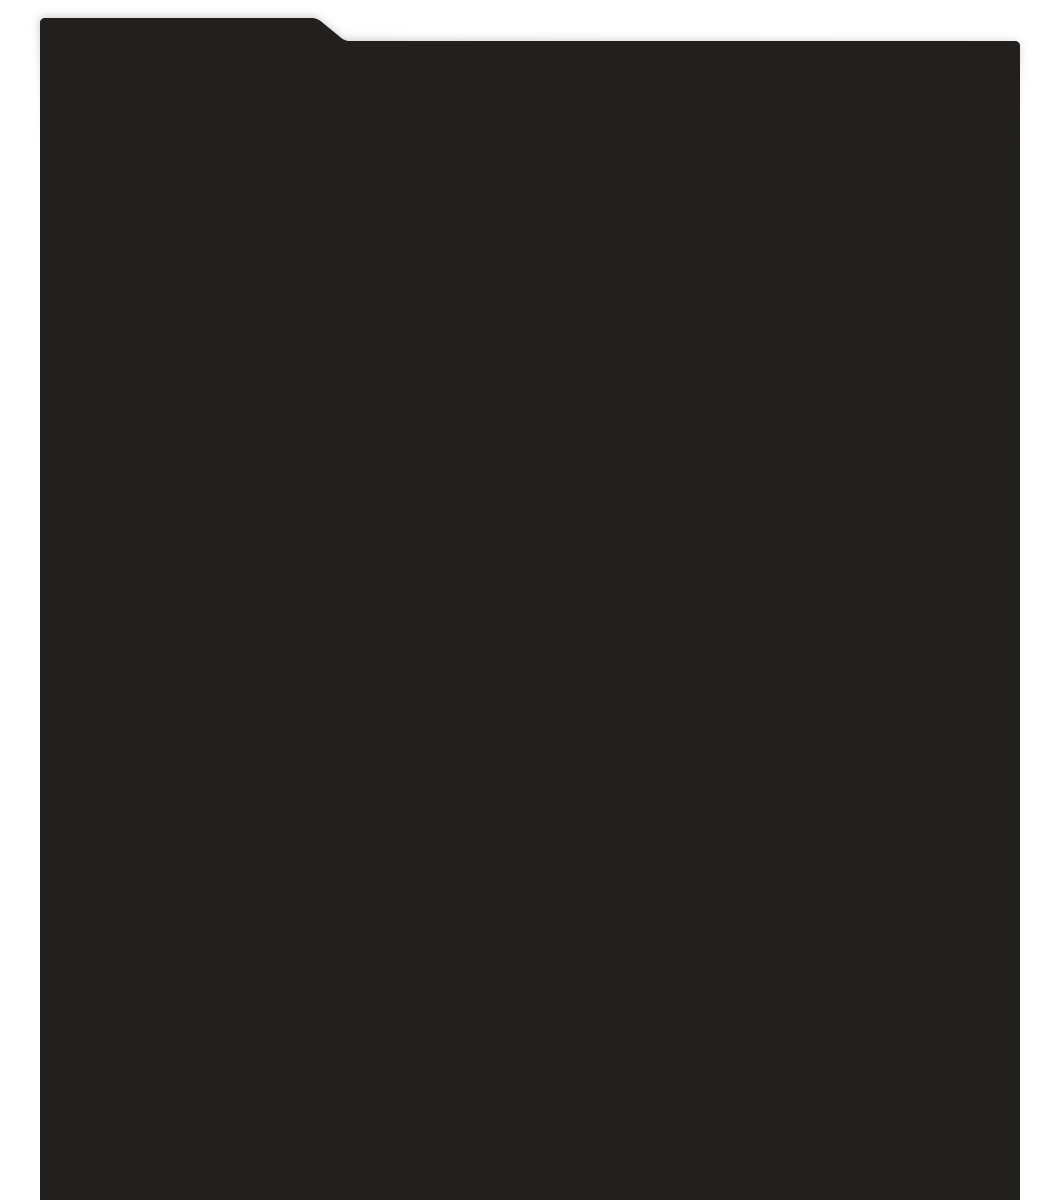
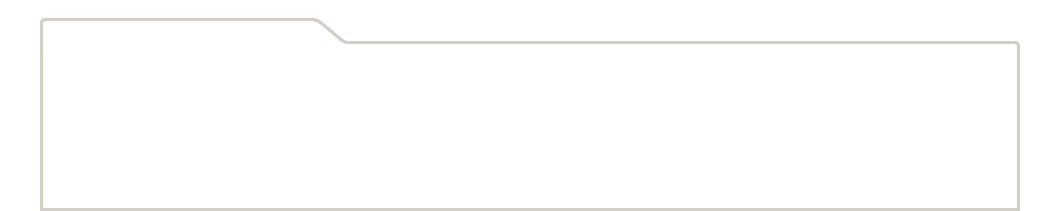
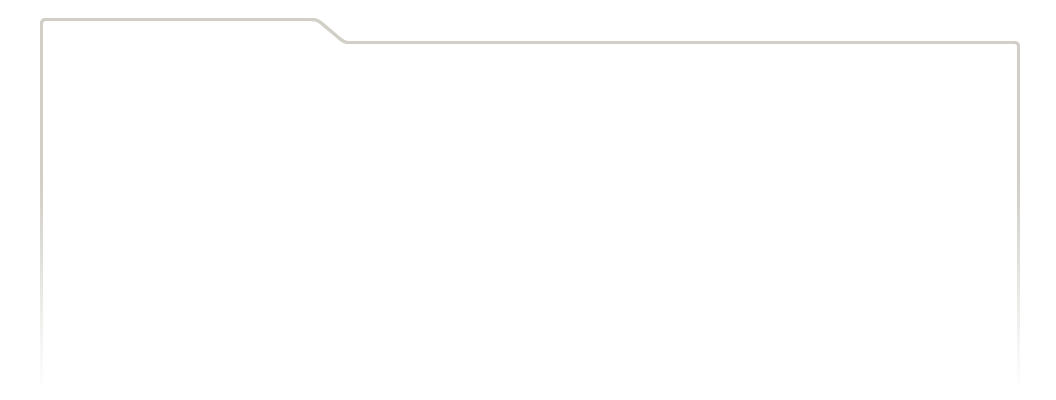
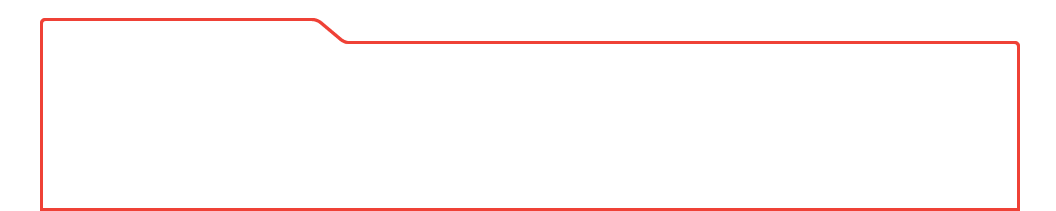
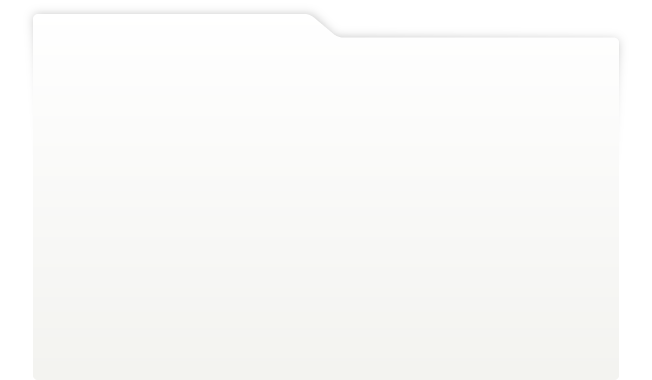
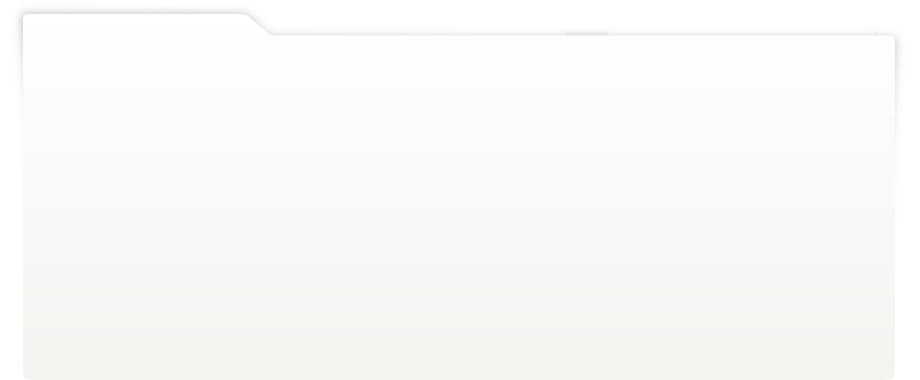
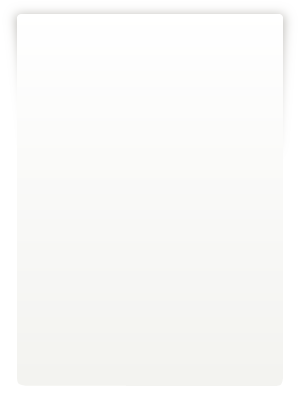
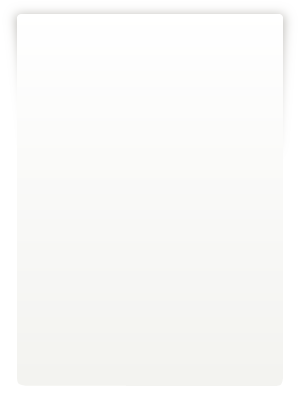
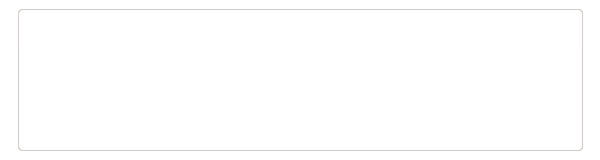
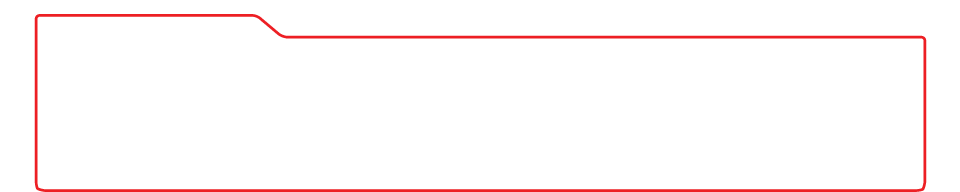
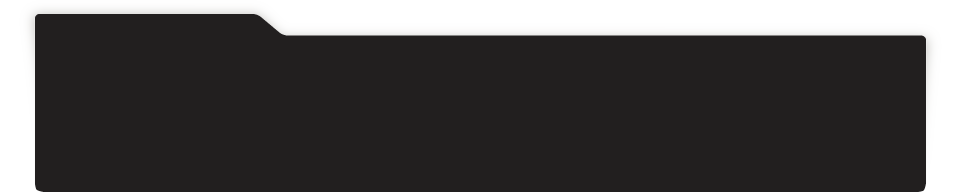
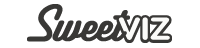
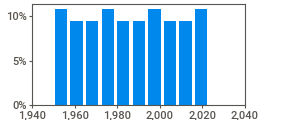
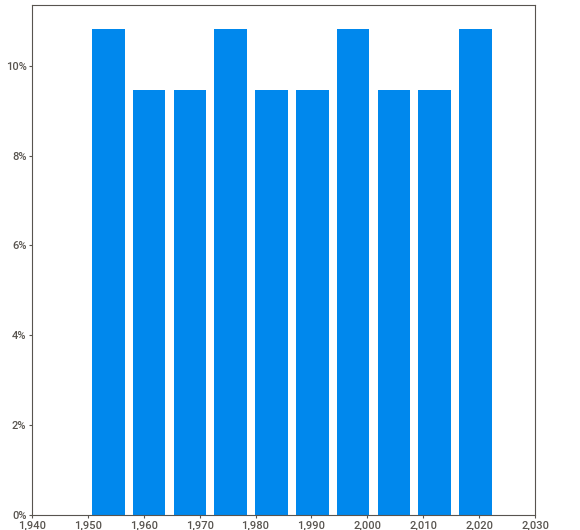
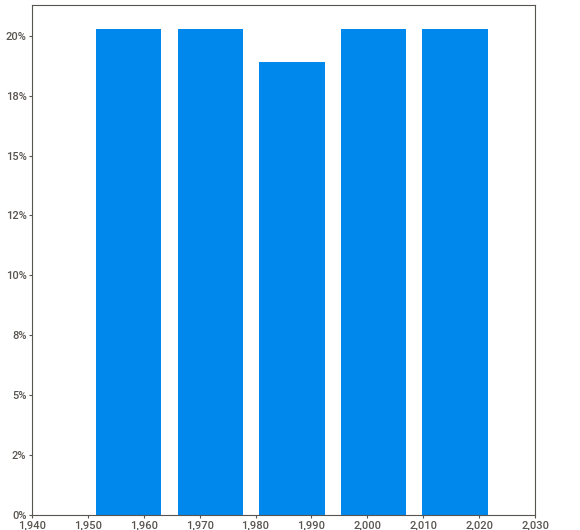
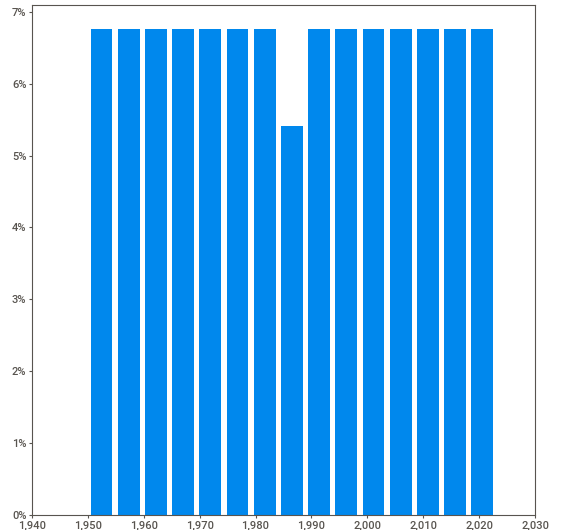
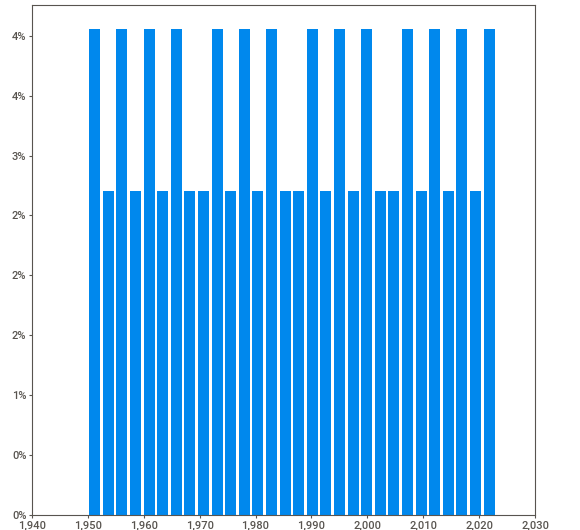
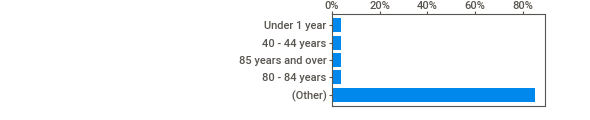
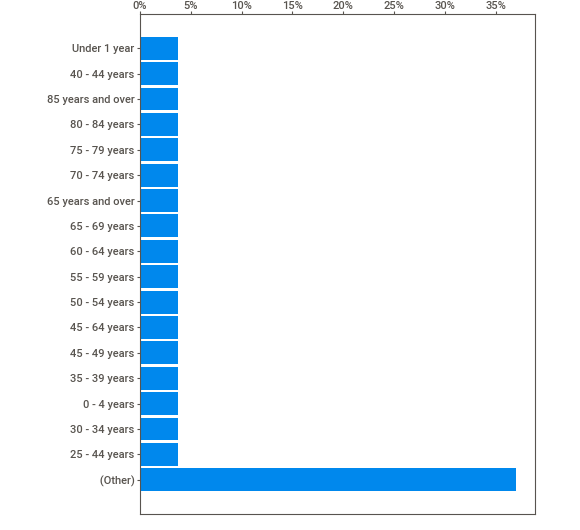
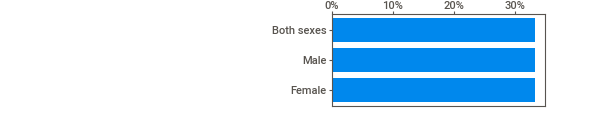
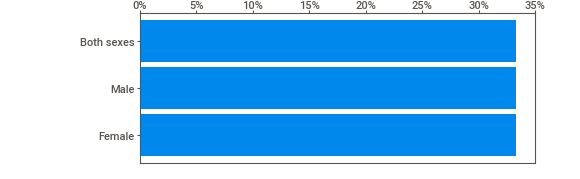
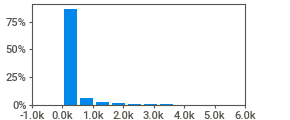
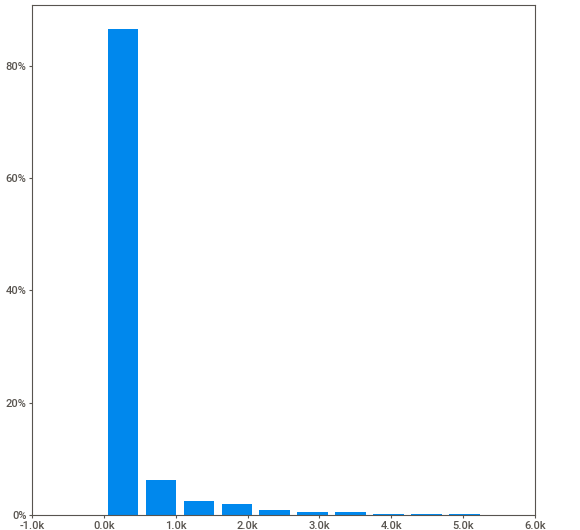
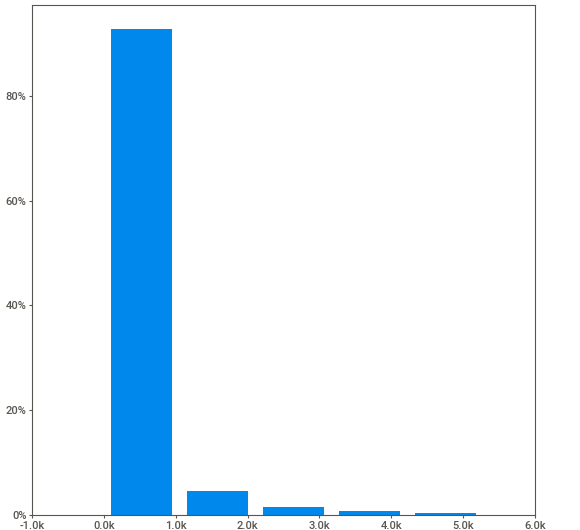
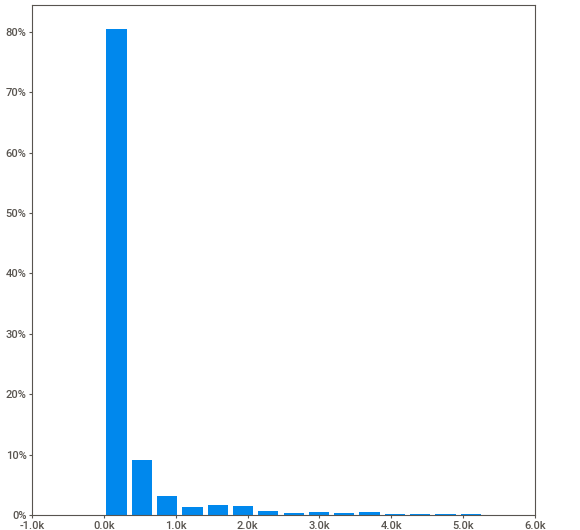
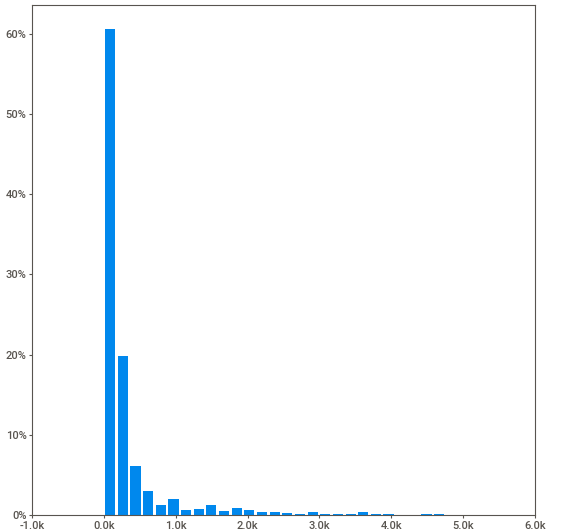
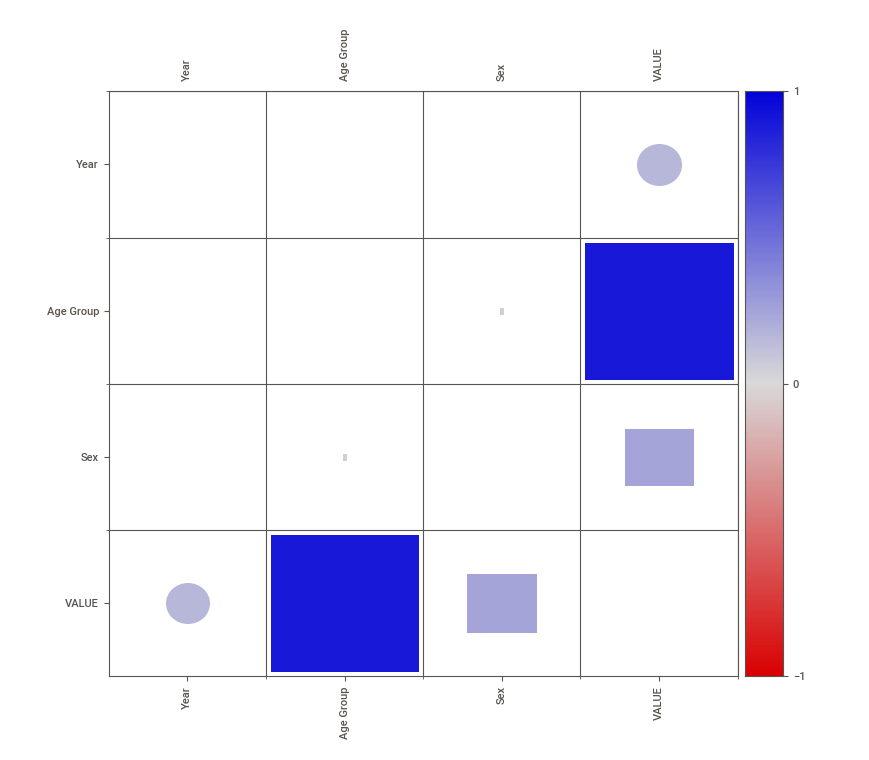
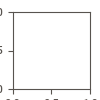

In [1799]:
IPython.display.HTML('analyze.html')

In [1800]:
df.Sex.unique() 

array(['Both sexes', 'Male', 'Female'], dtype=object)

In [1801]:
df = df.rename(columns={'Age Group': 'Age_Group'})
df.Age_Group.unique() 

array(['Under 1 year', '0 - 4 years', '0 - 14 years', '1 - 4 years',
       '5 - 9 years', '10 - 14 years', '15 - 19 years', '15 - 24 years',
       '15 years and over', '20 - 24 years', '25 - 29 years',
       '25 - 44 years', '30 - 34 years', '35 - 39 years', '40 - 44 years',
       '45 - 49 years', '45 - 64 years', '50 - 54 years', '55 - 59 years',
       '60 - 64 years', '65 - 69 years', '65 years and over',
       '70 - 74 years', '75 - 79 years', '80 - 84 years',
       '85 years and over', 'All ages'], dtype=object)

In [1802]:
SexSum_table = pd.crosstab(index=df['Sex'],columns='VALUE') 
SexSum_table

col_0,VALUE
Sex,
Both sexes,1998
Female,1998
Male,1998


In [1803]:
AgeSum_table = pd.crosstab(index=df['Age_Group'],columns='VALUE') 
AgeSum_table

col_0,VALUE
Age_Group,
0 - 14 years,222
0 - 4 years,222
1 - 4 years,222
10 - 14 years,222
15 - 19 years,222
15 - 24 years,222
15 years and over,222
20 - 24 years,222
25 - 29 years,222


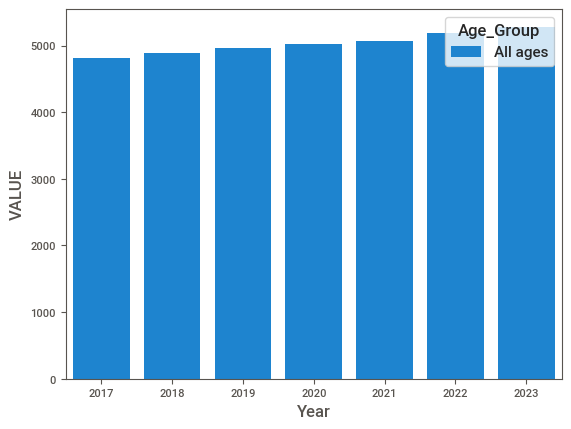

In [1804]:
NoGendersplit = df.loc[df['Sex'] =='Both sexes']
RecentYears = NoGendersplit.loc[df['Year'] > 2016]
AllAges = RecentYears.loc[df['Age_Group'] == "All ages"]
AllAges2 = RecentYears[RecentYears['Age_Group'].isin(['0 - 14 years', '15 - 24 years', '25 - 44 years', '45 - 64 years', '65 years and over'])]
AllAges3= AllAges2.loc[df['Year'] > 2022]
Image01 = sns.barplot(x='Year', y='VALUE', hue='Age_Group', data=AllAges) 



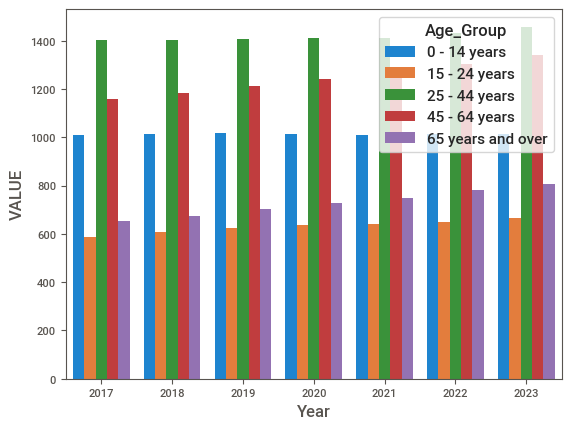

In [1805]:
Image02 = sns.barplot(x='Year', y='VALUE', hue='Age_Group', data=AllAges2) 

In [1806]:
AllAges3.describe()

,Year,VALUE
count,5.0,5.000000
mean,2023.0,1056.400000
std,0.0,338.174955
min,2023.0,667.000000
25%,2023.0,806.000000
50%,2023.0,1012.000000
75%,2023.0,1339.000000
max,2023.0,1458.000000


In [1807]:

value_counts = AllAges3['Age_Group'].value_counts()
relative_frequencies = value_counts / len(AllAges3)

In [1808]:
subtable = pd.DataFrame({'Age_Group': value_counts.index, 
                         'Frequency': value_counts.values, 
                         'Relative Frequency': relative_frequencies.values})
subtable

,Age_Group,Frequency,Relative Frequency
0,0 - 14 years,1,0.2
1,15 - 24 years,1,0.2
2,25 - 44 years,1,0.2
3,45 - 64 years,1,0.2
4,65 years and over,1,0.2


In [1809]:
mean= AllAges3['VALUE'].mean()
print(mean)

1056.4


In [1810]:
median = AllAges3['VALUE'].median()
print(median)

1012.0


In [1811]:
mode = AllAges3['VALUE'].mode()
print(mode)

0     667
1     806
2    1012
3    1339
4    1458
Name: VALUE, dtype: int32


In [1812]:
AllAges3

,Year,Age_Group,Sex,VALUE
5919,2023,0 - 14 years,Both sexes,1012
5934,2023,15 - 24 years,Both sexes,667
5946,2023,25 - 44 years,Both sexes,1458
5961,2023,45 - 64 years,Both sexes,1339
5976,2023,65 years and over,Both sexes,806


[Text(0.5, 0, 'Age Group'),
 Text(0, 0.5, 'Value'),
 Text(0.5, 1.0, 'Value Histogram')]

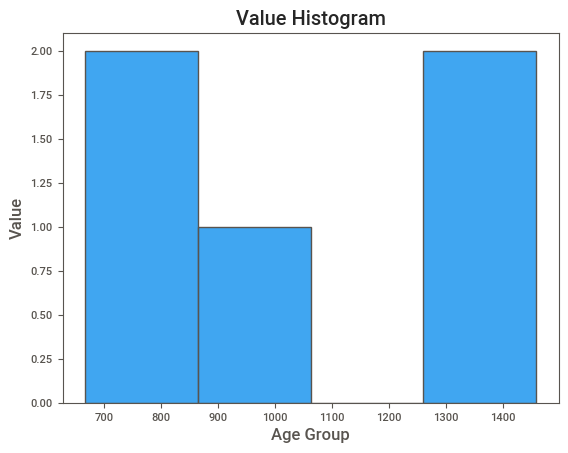

In [1813]:

image3 = sns.histplot(AllAges3.VALUE)
image3.set(xlabel='Age Group', ylabel='Value', title ='Value Histogram',)

<Axes: xlabel='Age_Group', ylabel='VALUE'>

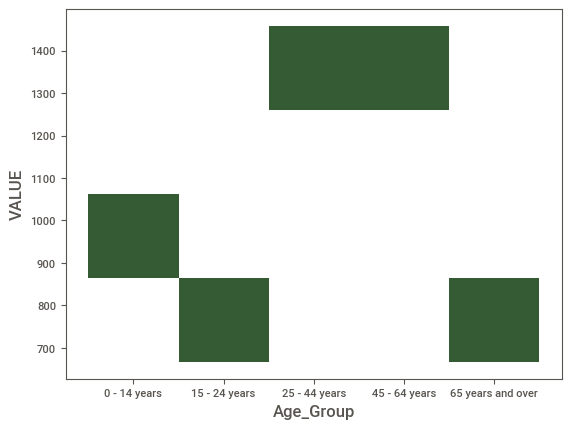

In [1814]:
sns.histplot(data=AllAges3, y="VALUE", x="Age_Group", kde=True, color ='green')

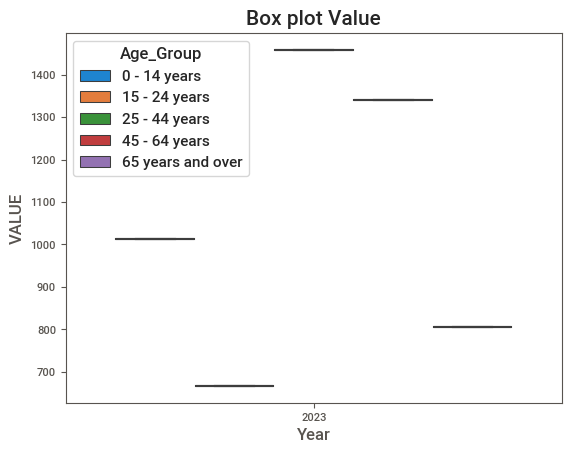

In [1815]:
sns.boxplot(x = 'Year', y ='VALUE', data=AllAges3, hue = 'Age_Group')
plt.title('Box plot Value', fontsize=15)
#plt.legend([], [], frameon=False)
plt.show()

In [1816]:
data_Age = AllAges3.groupby('Age_Group', axis = 0).sum()
data_Age

,Year,Sex,VALUE
Age_Group,,,
0 - 14 years,2023,Both sexes,1012
15 - 24 years,2023,Both sexes,667
25 - 44 years,2023,Both sexes,1458
45 - 64 years,2023,Both sexes,1339
65 years and over,2023,Both sexes,806


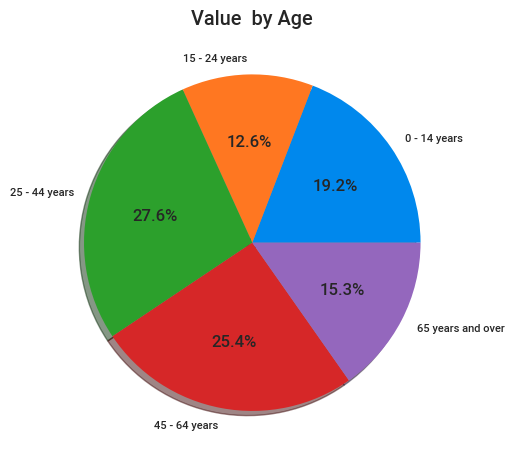

In [1817]:
Ages = ['0 - 14 years', '15 - 24 years', '25 - 44 years', '45 - 64 years', '65 years and over']
data_Age['VALUE'].plot(kind='pie', labels = Ages, radius=1, autopct='%1.1f%%', shadow = True)
plt.title('Value  by Age')
plt.ylabel("")
plt.tight_layout()

In [1818]:
data_Year = AllAges2.groupby('Year', axis = 0).sum()
data_Year

,Age_Group,Sex,VALUE
Year,,,
2017,0 - 14 years15 - 24 years25 - 44 years45 - 64 ...,Both sexesBoth sexesBoth sexesBoth sexesBoth s...,4810
2018,0 - 14 years15 - 24 years25 - 44 years45 - 64 ...,Both sexesBoth sexesBoth sexesBoth sexesBoth s...,4884
2019,0 - 14 years15 - 24 years25 - 44 years45 - 64 ...,Both sexesBoth sexesBoth sexesBoth sexesBoth s...,4959
2020,0 - 14 years15 - 24 years25 - 44 years45 - 64 ...,Both sexesBoth sexesBoth sexesBoth sexesBoth s...,5030
2021,0 - 14 years15 - 24 years25 - 44 years45 - 64 ...,Both sexesBoth sexesBoth sexesBoth sexesBoth s...,5074
2022,0 - 14 years15 - 24 years25 - 44 years45 - 64 ...,Both sexesBoth sexesBoth sexesBoth sexesBoth s...,5184
2023,0 - 14 years15 - 24 years25 - 44 years45 - 64 ...,Both sexesBoth sexesBoth sexesBoth sexesBoth s...,5282


In [1819]:
#Std Dev for Age_Group Data over Time
UpTo14AgesOverTime = NoGendersplit.loc[df['Age_Group'] == "0 - 14 years"]
UpTo24AgesOverTime = NoGendersplit.loc[df['Age_Group'] == "15 - 24 years"]
UpTo44AgesOverTime = NoGendersplit.loc[df['Age_Group'] == "25 - 44 years"]
UpTo64AgesOverTime = NoGendersplit.loc[df['Age_Group'] == "45 - 64 years"]
Over64AgesOverTime = NoGendersplit.loc[df['Age_Group'] == "65 years and over"]
AllAgesOverTime = NoGendersplit.loc[df['Age_Group'] == "All ages"]

In [1820]:
UpTo14AgesOverTime.describe()

,Year,VALUE
count,74.000000,74.000000
mean,1986.500000,934.013514
std,21.505813,69.457288
min,1950.000000,827.000000
25%,1968.250000,871.500000
50%,1986.500000,926.000000
75%,2004.750000,1005.000000
max,2023.000000,1045.000000


In [1821]:
UpTo24AgesOverTime.describe()

,Year,VALUE
count,74.000000,74.000000
mean,1986.500000,554.135135
std,21.505813,88.754907
min,1950.000000,392.000000
25%,1968.250000,459.750000
50%,1986.500000,589.500000
75%,2004.750000,625.500000
max,2023.000000,669.000000


In [1822]:
UpTo44AgesOverTime.describe()

,Year,VALUE
count,74.000000,74.000000
mean,1986.500000,975.689189
std,21.505813,300.655627
min,1950.000000,614.000000
25%,1968.250000,710.500000
50%,1986.500000,929.500000
75%,2004.750000,1275.250000
max,2023.000000,1458.000000


In [1823]:
UpTo64AgesOverTime.describe()

,Year,VALUE
count,74.000000,74.000000
mean,1986.500000,753.756757
std,21.505813,226.066290
min,1950.000000,575.000000
25%,1968.250000,596.000000
50%,1986.500000,606.000000
75%,2004.750000,895.750000
max,2023.000000,1339.000000


In [1824]:
Over64AgesOverTime.describe()

,Year,VALUE
count,74.000000,74.000000
mean,1986.500000,424.040541
std,21.505813,125.301329
min,1950.000000,315.000000
25%,1968.250000,325.250000
50%,1986.500000,386.000000
75%,2004.750000,456.750000
max,2023.000000,806.000000


In [1825]:
AllAgesOverTime.describe()

,Year,VALUE
count,74.000000,74.000000
mean,1986.500000,3641.391892
std,21.505813,718.985126
min,1950.000000,2818.000000
25%,1968.250000,2955.000000
50%,1986.500000,3527.500000
75%,2004.750000,4111.750000
max,2023.000000,5282.000000


In [1826]:
#We know have the Std Dev for all Age Ranges Over Time
# We know that there is mroe deviation in 
'''
Group	Mean	Stf Dev	Median	VC	Skew	Comments
UpTo14AgesOverTime	933.952703	69.463268	926.05	7%	0.34	The averages for this cohort seem to be steady over time, but with a distribution around the centre.
UpTo24AgesOverTime	554.005405	88.751429	589.6	16%	-1.20	The averages for this cohort seem to be fluctuating over time, but with a distribution to the Left. This tells us there are more results to the Left hand side of the curve or in other words this chort is declining.
UpTo44AgesOverTime	975.664865	300.655432	929.3	31%	0.46	The averages for this cohort seem to be fluctuating over time, but with a distribution around the centre.
UpTo64AgesOverTime	753.698649	226.052104	605.95	30%	1.96	The averages for this cohort seem to be fluctuating over time, but with a distribution to the right. This tells us there are more results to the right hand side of the curve or in other words this chort is growing.
Over64AgesOverTime	424.013514	125.403394	386.3	30%	0.90	The averages for this cohort seem to be fluctuating over time, but with a distribution to the right. This tells us there are more results to the right hand side of the curve or in other words this chort is growing.
AllAgesOverTime	3641.322973	718.940701	3527.35	20%	0.48	The averages for this cohort seem to be fluctuating over time, but with a distribution to the right. This tells us there are more results to the right hand side of the curve or in other words the overall population is growing.
'''


'\nGroup\tMean\tStf Dev\tMedian\tVC\tSkew\tComments\nUpTo14AgesOverTime\t933.952703\t69.463268\t926.05\t7%\t0.34\tThe averages for this cohort seem to be steady over time, but with a distribution around the centre.\nUpTo24AgesOverTime\t554.005405\t88.751429\t589.6\t16%\t-1.20\tThe averages for this cohort seem to be fluctuating over time, but with a distribution to the Left. This tells us there are more results to the Left hand side of the curve or in other words this chort is declining.\nUpTo44AgesOverTime\t975.664865\t300.655432\t929.3\t31%\t0.46\tThe averages for this cohort seem to be fluctuating over time, but with a distribution around the centre.\nUpTo64AgesOverTime\t753.698649\t226.052104\t605.95\t30%\t1.96\tThe averages for this cohort seem to be fluctuating over time, but with a distribution to the right. This tells us there are more results to the right hand side of the curve or in other words this chort is growing.\nOver64AgesOverTime\t424.013514\t125.403394\t386.3\t30%\t0.

In [1827]:
AllAgesFinal = NoGendersplit[NoGendersplit['Age_Group'].isin(['0 - 14 years', '15 - 24 years', '25 - 44 years', '45 - 64 years', '65 years and over'])]

In [1828]:
AllAgesFinal.head(10)

,Year,Age_Group,Sex,VALUE
6,1950,0 - 14 years,Both sexes,851
21,1950,15 - 24 years,Both sexes,453
33,1950,25 - 44 years,Both sexes,774
48,1950,45 - 64 years,Both sexes,575
63,1950,65 years and over,Both sexes,317
87,1951,0 - 14 years,Both sexes,855
102,1951,15 - 24 years,Both sexes,443
114,1951,25 - 44 years,Both sexes,771
129,1951,45 - 64 years,Both sexes,575
144,1951,65 years and over,Both sexes,316


In [1829]:
#Updating Field Types for NExt Stages

In [1830]:
AllAgesFinal.info()

<class 'pandas.core.frame.DataFrame'>
Index: 370 entries, 6 to 5976
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Year       370 non-null    int32 
 1   Age_Group  370 non-null    object
 2   Sex        370 non-null    object
 3   VALUE      370 non-null    int32 
dtypes: int32(2), object(2)
memory usage: 11.6+ KB


In [1831]:
AllAgesFinal2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 370 entries, 6 to 5976
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Year        370 non-null    int32
 1   VALUE       370 non-null    int32
 2   Age_Group1  370 non-null    int64
dtypes: int32(2), int64(1)
memory usage: 8.7 KB


<Axes: xlabel='Year'>

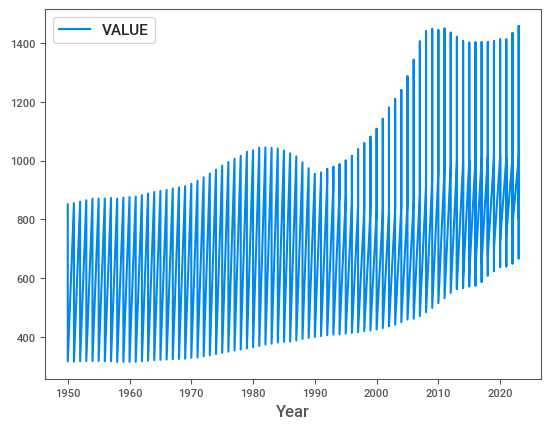

In [1832]:
AllAgesFinal2 = AllAgesFinal.loc[df['Year'] > 1900]
AllAgesFinal2.plot.line(x='Year', y='VALUE')

In [1833]:
UpTo14AgesOverTime.set_index('Year')


,Age_Group,Sex,VALUE
Year,,,
1950,0 - 14 years,Both sexes,851
1951,0 - 14 years,Both sexes,855
1952,0 - 14 years,Both sexes,860
1953,0 - 14 years,Both sexes,865
1954,0 - 14 years,Both sexes,870
...,...,...,...
2019,0 - 14 years,Both sexes,1016
2020,0 - 14 years,Both sexes,1014
2021,0 - 14 years,Both sexes,1008


In [1834]:
UpTo24AgesOverTime.set_index('Year')

,Age_Group,Sex,VALUE
Year,,,
1950,15 - 24 years,Both sexes,453
1951,15 - 24 years,Both sexes,443
1952,15 - 24 years,Both sexes,438
1953,15 - 24 years,Both sexes,432
1954,15 - 24 years,Both sexes,427
...,...,...,...
2019,15 - 24 years,Both sexes,624
2020,15 - 24 years,Both sexes,638
2021,15 - 24 years,Both sexes,640


<Axes: xlabel='Year'>

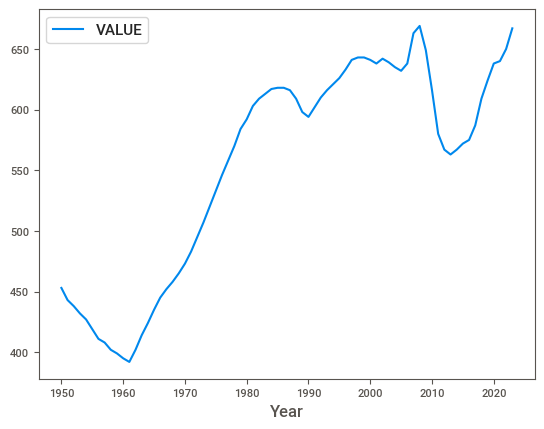

In [1835]:
UpTo24AgesOverTime.plot.line(x='Year', y='VALUE')

<Axes: xlabel='Year'>

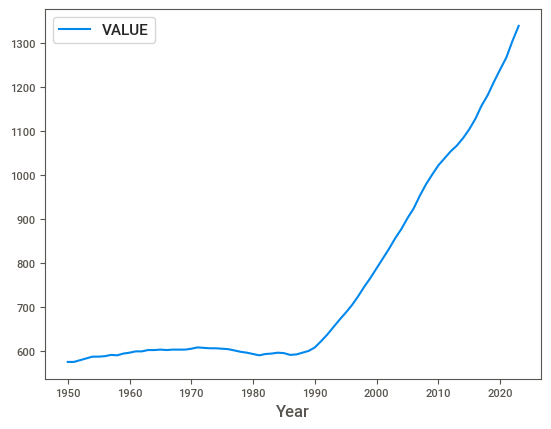

In [1836]:
UpTo64AgesOverTime.plot.line(x='Year', y='VALUE')

C:\Users\Admin\AppData\Local\Temp\ipykernel_10340\2796400371.py:4: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(UpTo24AgesOverTime.Year, UpTo24AgesOverTime.VALUE, s = area, c = colors, alpha = 0.5)


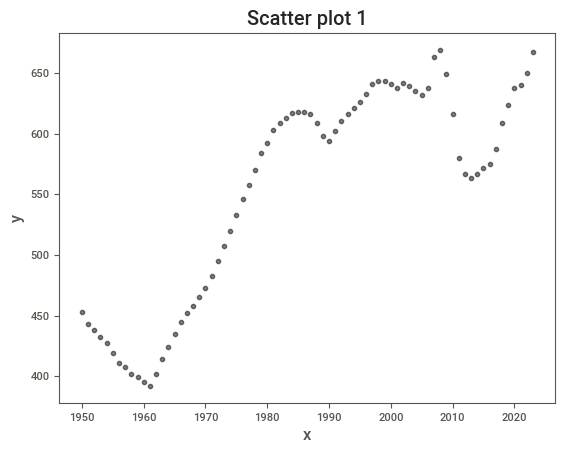

In [1837]:
# Scatter Plot
colors = (0,0,0)
area = np.pi*3
plt.scatter(UpTo24AgesOverTime.Year, UpTo24AgesOverTime.VALUE, s = area, c = colors, alpha = 0.5)
plt.title('Scatter plot 1')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_10340\3165989261.py:3: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(UpTo64AgesOverTime.Year, UpTo64AgesOverTime.VALUE, s = area, c = colors, alpha = 0.5)


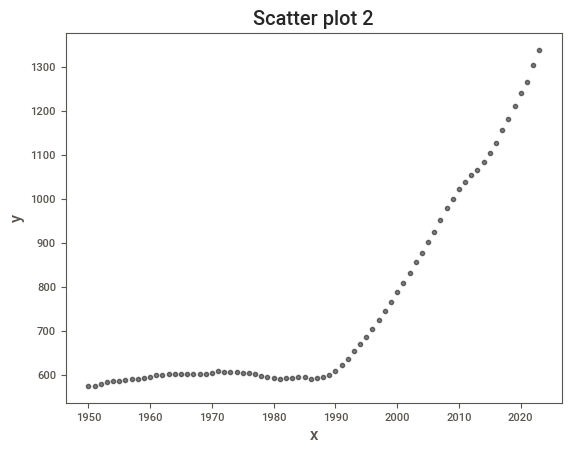

In [1838]:
# Scatter Plot

plt.scatter(UpTo64AgesOverTime.Year, UpTo64AgesOverTime.VALUE, s = area, c = colors, alpha = 0.5)
plt.title('Scatter plot 2')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [1839]:
def f(row):
    if row['Age_Group'] == "0 - 14 years":
        val = 1
    elif row['Age_Group'] == "15 - 24 years":
        val = 2
    elif row['Age_Group'] == "25 - 44 years":
        val = 3
    elif row['Age_Group'] == "45 - 64 years":
        val = 4
    else:
        val = 5
    return val

In [1840]:
AllAgesFinal2['Age_Group1'] = df.apply(f, axis=1)

In [1841]:
AllAgesFinal2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 370 entries, 6 to 5976
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Year        370 non-null    int32 
 1   Age_Group   370 non-null    object
 2   Sex         370 non-null    object
 3   VALUE       370 non-null    int32 
 4   Age_Group1  370 non-null    int64 
dtypes: int32(2), int64(1), object(2)
memory usage: 14.5+ KB


In [1842]:
AllAgesFinal2.head()

,Year,Age_Group,Sex,VALUE,Age_Group1
6,1950,0 - 14 years,Both sexes,851,1
21,1950,15 - 24 years,Both sexes,453,2
33,1950,25 - 44 years,Both sexes,774,3
48,1950,45 - 64 years,Both sexes,575,4
63,1950,65 years and over,Both sexes,317,5


In [1843]:
# Putting feature variable to X
AllAgesFinal2x = AllAgesFinal2[['Age_Group1','Year']]

# Putting response variable to y
AllAgesFinal2y = AllAgesFinal2['VALUE']

In [1844]:
lm.fit(AllAgesFinal2x,AllAgesFinal2y)

LinearRegression()

In [1845]:
AllAgesFinal2x = sm.add_constant(AllAgesFinal2x)

In [1846]:
lm_1 = sm.OLS(AllAgesFinal2y, AllAgesFinal2x).fit()
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  VALUE   R-squared:                       0.405
Model:                            OLS   Adj. R-squared:                  0.402
Method:                 Least Squares   F-statistic:                     125.0
Date:                Mon, 06 Nov 2023   Prob (F-statistic):           4.06e-42
Time:                        00:20:26   Log-Likelihood:                -2515.1
No. Observations:                 370   AIC:                             5036.
Df Residuals:                     367   BIC:                             5048.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.168e+04   1052.320    -11.101      0.0

<Axes: >

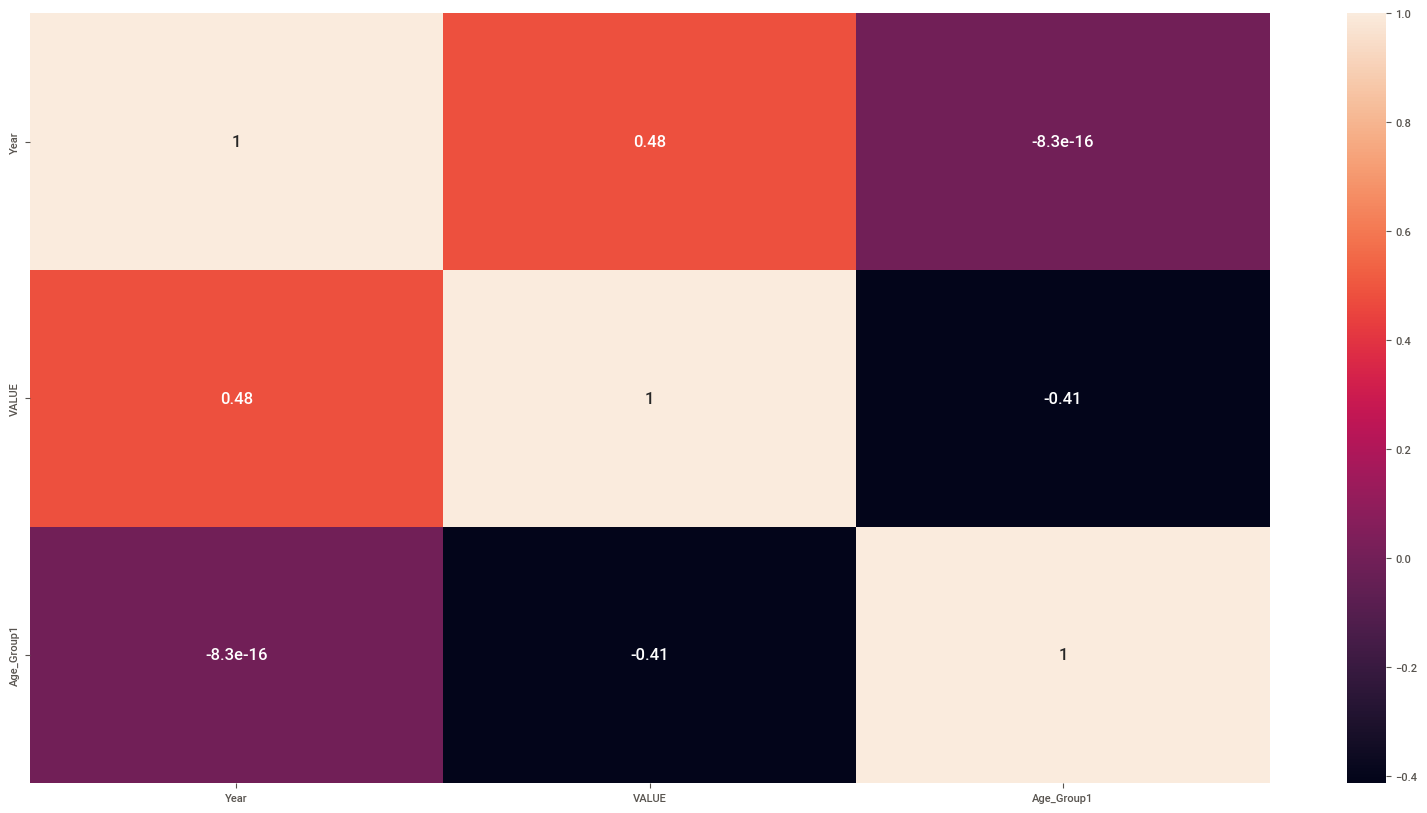

In [1847]:
AllAgesFinal2 = AllAgesFinal2.drop(["Age_Group","Sex"], axis=1)
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(AllAgesFinal2.corr(),annot = True)

In [1848]:
# Making predictions using the model
AllAgesFinal2x = AllAgesFinal2[['Age_Group1','Year']]
AllAgesFinal2x = sm.add_constant(AllAgesFinal2x)
Predicted_views = lm_1.predict(AllAgesFinal2x)

In [1849]:
mse = mean_squared_error(AllAgesFinal2.VALUE, Predicted_views)
r_squared = r2_score(AllAgesFinal2.VALUE, Predicted_views)

In [1850]:
print('Mean_Squared_Error :' ,mse)
print('r_square_value :',r_squared)

Mean_Squared_Error : 46958.23213342822
r_square_value : 0.4051111097052421


Text(0, 0.5, 'VALUE')

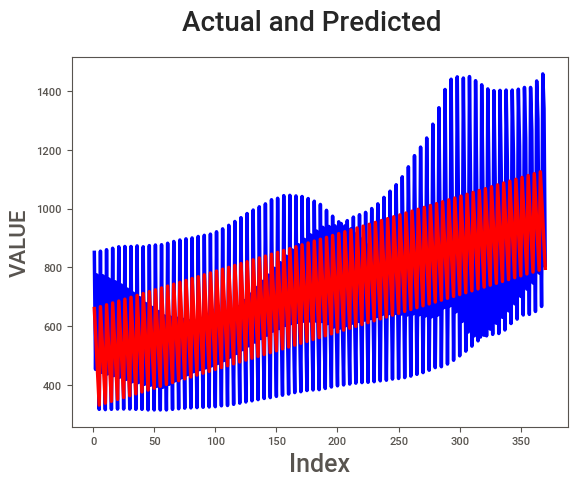

In [1851]:
#Actual vs Predicted
c = [i for i in range(1,371,1)]
fig = plt.figure()
plt.plot(c,AllAgesFinal2.VALUE, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c,Predicted_views, color="red",  linewidth=2.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('VALUE', fontsize=16)                               # Y-label

In [1852]:
UpTo24AgesOverTime.shape

(74, 4)

In [1853]:
#37 is half of the rows

In [1854]:
n_train = 37
# extract the target values (number of rentals)
y1 = UpTo24AgesOverTime.VALUE
X1 = UpTo24AgesOverTime.Year

In [1866]:
# function to evaluate and plot a regressor on a given feature set
def eval_on_features(features, target, regressor):
    # split the given features into a training and a test set
    X1_train, X1_test = features[:n_train], features[n_train:]
    # also split the target array
    y1_train, y1_test = target[:n_train], target[n_train:]    
    regressor.fit(X1_train, y1_train)
    print("Test-set R^2: {:.2f}".format(regressor.score(X1_test, y1_test)))
    y_pred = regressor.predict(X1_test)
    y_pred_train = regressor.predict(X1_train)
    plt.figure(figsize = (10, 3))

    plt.xticks(range(0, len(X), 8), xticks.strftime("%a %m-%d"), rotation = 90, ha = "left")

    plt.plot(range(n_train), y1_train, label = "train")
    plt.plot(range(n_train, len(y1_test) + n_train), y1_test, '-', label = "test")
    plt.plot(range(n_train), y_pred_train, '--', label = "prediction train")

    plt.plot(range(n_train, len(y1_test) + n_train), y_pred, '--', label = "prediction test")
    plt.legend(loc = (1.01, 0))
    plt.xlabel("YEAR")
    plt.ylabel("VALUES")

In [1867]:
print(X1, y1)

21      1950
102     1951
183     1952
264     1953
345     1954
        ... 
5610    2019
5691    2020
5772    2021
5853    2022
5934    2023
Name: Year, Length: 74, dtype: int32 21      453
102     443
183     438
264     432
345     427
       ... 
5610    624
5691    638
5772    640
5853    650
5934    667
Name: VALUE, Length: 74, dtype: int32


In [1868]:
# Create an object 'regressor' by calling a method RandomForestRegressor()
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)

# Call the method eval_on_features() to calculate the R^2 and plot
eval_on_features(X1, y1, regressor)

ValueError: Expected 2D array, got 1D array instead:
array=[1950. 1951. 1952. 1953. 1954. 1955. 1956. 1957. 1958. 1959. 1960. 1961.
 1962. 1963. 1964. 1965. 1966. 1967. 1968. 1969. 1970. 1971. 1972. 1973.
 1974. 1975. 1976. 1977. 1978. 1979. 1980. 1981. 1982. 1983. 1984. 1985.
 1986.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.